# PUBG Finish Placement Prediction
## 1 MLP

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv( './train_V2.csv')
df = df.dropna()
print(df.shape)

(4446965, 29)


In [3]:
target = 'winPlacePerc'
features = list(df.columns)
features.remove("Id")
features.remove("matchId")
features.remove("groupId")
features.remove("matchType")

y = np.array(df[target])
features.remove(target)
x = df[features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
print(x_test.shape, x_train.shape, y_train.shape)

(444697, 24) (4002268, 24) (4002268,)


## 1.1 构建MLP模型

In [4]:
from keras import models
from keras import layers
from keras import Sequential
from keras.layers import Dense, Dropout, Input

def build_model():
    model = Sequential()
    model.add(Dense(80,input_dim=x_train.shape[1],activation='relu'))
    model.add(Dense(160,activation='relu'))
    model.add(Dense(320,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(160,activation='relu'))
    model.add(Dense(80,activation='relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


## 1.2 训练

In [5]:
from keras import backend as K
# Some memory clean-up
K.clear_session()

In [7]:
num_epochs = 100
model = build_model()
history = model.fit(x_train, y_train, validation_split=0.2, epochs=num_epochs, batch_size=10000, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 80)                2000      
_________________________________________________________________
dense_10 (Dense)             (None, 160)               12960     
_________________________________________________________________
dense_11 (Dense)             (None, 320)               51520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 160)               51360     
_________________________________________________________________
dense_13 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_14 (Dense)             (None, 40)                3240      
__________

3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0072 - mean_absolute_error: 0.0605 - val_loss: 0.0075 - val_mean_absolute_error: 0.0619
Epoch 40/100
3201814/3201814 [==============================] - 7s 2us/step - loss: 0.0072 - mean_absolute_error: 0.0605 - val_loss: 0.0072 - val_mean_absolute_error: 0.0611
Epoch 41/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0071 - mean_absolute_error: 0.0602 - val_loss: 0.0075 - val_mean_absolute_error: 0.0630
Epoch 42/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0072 - mean_absolute_error: 0.0604 - val_loss: 0.0080 - val_mean_absolute_error: 0.0663
Epoch 43/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0071 - mean_absolute_error: 0.0601 - val_loss: 0.0072 - val_mean_absolute_error: 0.0617
Epoch 44/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0071 - mean_absolute_error: 0.0602 - val_loss: 0.0072 - v

3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0068 - mean_absolute_error: 0.0587 - val_loss: 0.0075 - val_mean_absolute_error: 0.0640
Epoch 87/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0068 - mean_absolute_error: 0.0587 - val_loss: 0.0070 - val_mean_absolute_error: 0.0603
Epoch 88/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0068 - mean_absolute_error: 0.0587 - val_loss: 0.0076 - val_mean_absolute_error: 0.0644
Epoch 89/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0067 - mean_absolute_error: 0.0586 - val_loss: 0.0081 - val_mean_absolute_error: 0.0657
Epoch 90/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0068 - mean_absolute_error: 0.0589 - val_loss: 0.0074 - val_mean_absolute_error: 0.0639
Epoch 91/100
3201814/3201814 [==============================] - 6s 2us/step - loss: 0.0068 - mean_absolute_error: 0.0587 - val_loss: 0.0072 - v

100轮训练后，模型MAE收敛于0.06左右，Loss收敛于0.01，效果还是可以的。

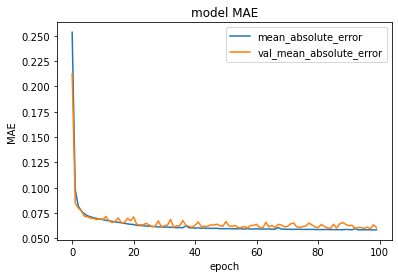

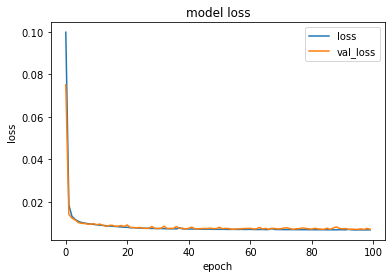

In [14]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model MAE')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.legend(['mean_absolute_error', 'val_mean_absolute_error'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'])
    plt.show()
plot_history(history)

In [10]:
pred = model.predict(x_test)
print('mae train: ', mean_absolute_error(model.predict(x_train), y_train))
print('mae test: ', mean_absolute_error(pred, y_test))

mae train:  0.0603489711746765
mae test:  0.06065848714850899


## 2 结果对比分析
我们将三个模型的结果综合到一起进行对比分析，可以看出，三个模型中随机森林的效果是最好的，其次是MLP，线性回归效果最差。  
在实验过程中，随机森林的训练时间也比MLP要短。  
（注：这里为了显示美观，将数值保留至小数点后5位）

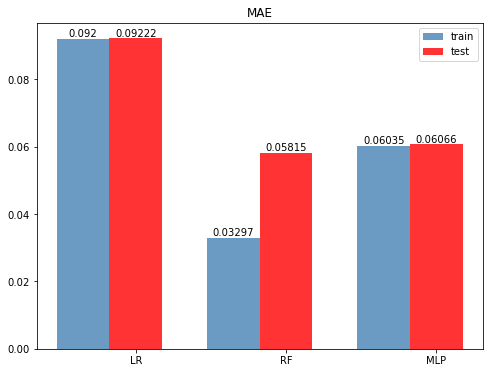

In [16]:
name_list = ['LR', 'RF', 'MLP']
y_train = [0.09199775645256723, 0.03297402648441849, 0.0603489711746765]
y_text = [0.09222107817896709, 0.058151005937161174, 0.06065848714850899]
x =list(range(len(y_train)))
total_width, n = 0.7, 2
width = total_width / n

plt.figure(figsize=(8, 6))
plt.bar(x, y_train, width=width, label='train', color='steelblue', alpha=0.8)
for x1, yy in zip(x, y_train):
    plt.text(x1, yy, str(round(yy, 5)), ha='center', va='bottom', fontsize=10, rotation=0)
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, y_text, width=width, label='test', tick_label=name_list, fc='r', alpha=0.8)
for x1, yy in zip(x, y_text):
    plt.text(x1, yy, str(round(yy, 5)), ha='center', va='bottom', fontsize=10, rotation=0)
plt.title("MAE")
plt.legend()
plt.show()